In [97]:
import matplotlib.pyplot as plt
import numpy as np

In [98]:
X = np.linspace(-5,5,300)

In [99]:
def sigmoid(X):
    return 1. / (1 + np.exp(-X + 1e-6))

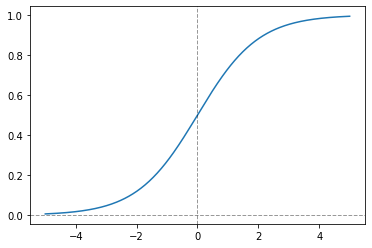

In [100]:
plt.plot(X, sigmoid(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

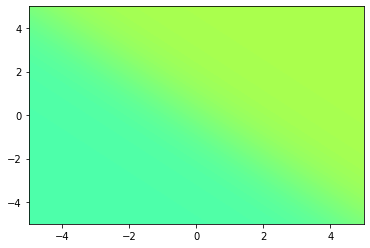

In [101]:
x1, x2 = np.meshgrid(X, X)
plt.contourf(x1, x2, sigmoid(x1  + x2), 100, cmap = plt.cm.jet, vmin = -4, vmax = 5)

In [102]:
def sigmoid_prime(X):
    return sigmoid(X) * (1 - sigmoid(X))

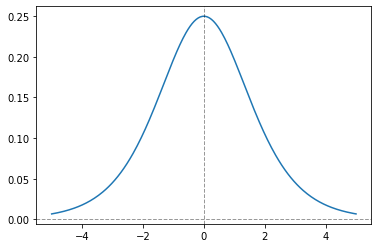

In [103]:
plt.plot(X, sigmoid_prime(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [104]:
def ReLU(X):
    return np.where(X > 0, X, 0)

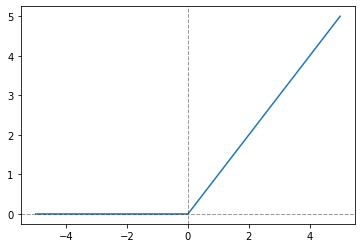

In [105]:
plt.plot(X, ReLU(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

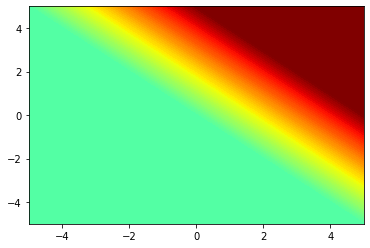

In [106]:
plt.contourf(x1, x2, ReLU(x1  + x2), 100, cmap = plt.cm.jet, vmin = -4, vmax = 5)

In [107]:
def ReLU_prime(X):
    return np.heaviside(X, 0)

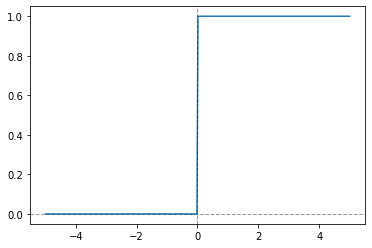

In [108]:
plt.plot(X, ReLU_prime(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [109]:
def ELU(X, alpha = .2):
    """
    alpha = [.1, .3]
    """
    return np.where(X > 0, X, alpha * (np.exp(X)-1))

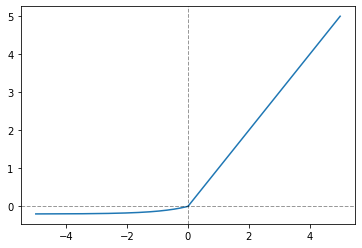

In [110]:
plt.plot(X, ELU(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

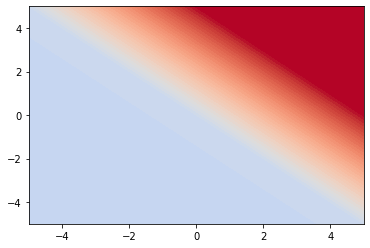

In [111]:
plt.contourf(x1, x2, ELU(x1  + x2), 100, cmap = plt.cm.coolwarm, vmin = -4, vmax = 5)

In [112]:
def ELU_prime(X, alpha = .2):
    '''
    alpha = [.1, .3]
    '''
    return np.where(X > 0, 1, ELU(X) + alpha)

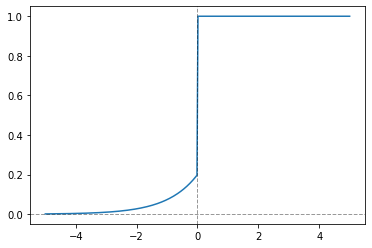

In [113]:
plt.plot(X, ELU_prime(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [114]:
def LeakyReLU(X, alpha = .01):
    '''
    alpha : small int like .01
    '''
    return np.where(X > 0, X, alpha * X)

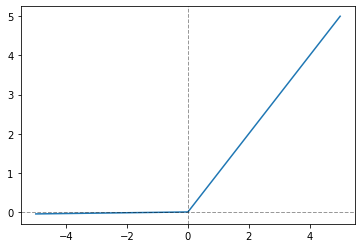

In [115]:
plt.plot(X, LeakyReLU(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

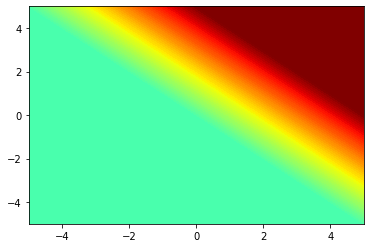

In [116]:
plt.contourf(x1, x2, LeakyReLU(x1  + x2), 100, cmap = plt.cm.jet, vmin = -4, vmax = 5)

In [117]:
def LeakyReLU_prime(X, alpha = .01):
    return np.where(X > 0, 1, alpha)

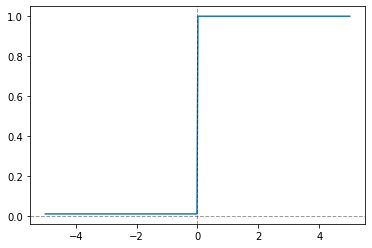

In [118]:
plt.plot(X, LeakyReLU_prime(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [119]:
def SELU(X, alpha= 1.6732632423543772848170429916717, l = 1.0507009873554804934193349852946):
    return np.where(X>0, l * X, l * alpha * (np.exp(X) - 1))

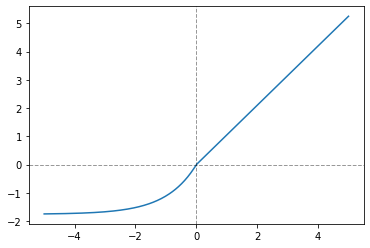

In [120]:
plt.plot(X, SELU(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

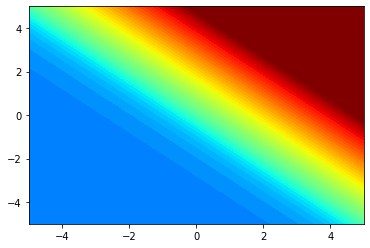

In [121]:
plt.contourf(x1, x2, SELU(x1  + x2), 100, cmap = plt.cm.jet, vmin = -4, vmax = 5)

In [122]:
def SELU_prime(X, alpha = 1.6732632423543772848170429916717, l = 1.0507009873554804934193349852946):
    return np.where(X > 0, l, l * alpha * np.exp(X))

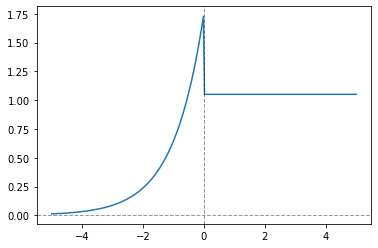

In [123]:
plt.plot(X, SELU_prime(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [124]:
def GELU(X):
    return .5 * X * ( 1 + np.tanh( np.power(2/np.pi, 1/2) * (X + (.044715 * np.power(X, 3))) ) )

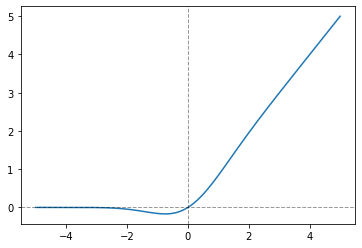

In [125]:
plt.plot(X, GELU(X))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

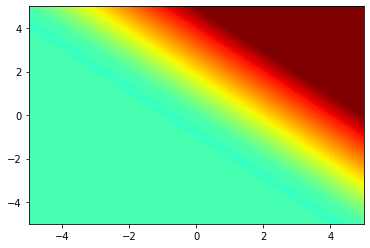

In [126]:
plt.contourf(x1, x2, GELU(x1  + x2), 100, cmap = plt.cm.jet, vmin = -4, vmax = 5)

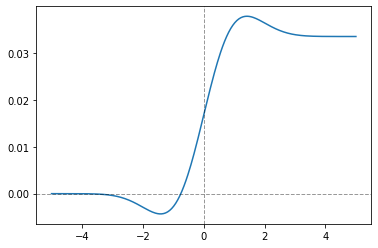

In [127]:
#GELU_prime
plt.plot(X, np.gradient(GELU(X)))
plt.axhline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')
plt.axvline(0, color='black', linewidth=1, alpha = .4, linestyle = '--')

In [279]:
from matplotlib import animation
class activation_Vis(object):
    def __init__(self, n_iter = 24, x_min = -3, x_max = 3, random_state = 42,
                sigmoid:bool = True, ReLU:bool = True, ELU:bool = True, LeakyReLU:bool = True, SELU:bool = True, GELU:bool = True):
        self.min_ = []
        self.max_ = []
        self.n_iter = n_iter
        self.x_min = x_min
        self.x_max = x_max
        self.x_ = np.linspace(self.x_min, self.x_max, self.n_iter * 2)
        def f_sigmoid(X):
            return 1. / (1 + np.exp(-X + 1e-6))
        def f_ReLU(X):
            return np.where(X > 0, X, 0)
        def f_ELU(X, alpha = .2):
            """
            alpha = [.1, .3]
            """
            return np.where(X > 0, X, alpha * (np.exp(X)-1))
        def f_LeakyReLU(X, alpha = .1):
            '''
            alpha : small int like .01 / for vis, set alpha as .1
            '''
            return np.where(X > 0, X, alpha * X)
        def f_SELU(X, alpha= 1.6732632423543772848170429916717, l = 1.0507009873554804934193349852946):
            return np.where(X>0, l * X, l * alpha * (np.exp(X) - 1))
        def f_GELU(X):
            return .5 * X * ( 1 + np.tanh( np.power(2/np.pi, 1/2) * (X + (.044715 * np.power(X, 3))) ) )
        if sigmoid:
            self.sigmoid = sigmoid
            self.y_sigmoid_ = f_sigmoid(self.x_)
            self.min_.append(self.y_sigmoid_[0])
            self.max_.append(self.y_sigmoid_[-1])
        if ReLU:
            self.ReLU = ReLU
            self.y_ReLU = f_ReLU(self.x_)
            self.min_.append(self.y_ReLU[0])
            self.max_.append(self.y_ReLU[-1])
        if ELU:
            self.ELU = ELU
            self.y_ELU = f_ELU(self.x_)
            self.min_.append(self.y_ELU[0])
            self.max_.append(self.y_ELU[-1])
        if LeakyReLU:
            self.LeakyReLU = LeakyReLU
            self.y_LeakyReLU = f_LeakyReLU(self.x_)
            self.min_.append(self.y_LeakyReLU[0])
            self.max_.append(self.y_LeakyReLU[-1])
        if SELU:
            self.SELU =SELU
            self.y_SELU = f_SELU(self.x_)
            self.min_.append(self.y_SELU[0])
            self.max_.append(self.y_SELU[-1])
        if GELU:
            self.GELU = GELU
            self.y_GELU = f_GELU(self.x_)
            self.min_.append(self.y_GELU[0])
            self.max_.append(self.y_GELU[-1])
        self.min_ = np.min(self.min_)
        self.max_ = np.max(self.max_)
        
    def visualize(self, figsize_x, figsize_y, dpi):
        fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
        fig.suptitle('Activation function Visualization')
        def animate(i):
            fig.clear()
            fig.suptitle('Activation function Visualization', fontsize = 25)
            ax = fig.add_subplot(111, aspect = 'equal', autoscale_on = False, xlim = (self.x_min, self.x_max), ylim = (self.min_, self.max_))
            ax.set_xlim(self.x_min, self.x_max)
            ax.set_ylim(self.min_, self.max_)
            ax.grid(b = None)
            ax.plot([self.x_min,self.x_max],[0,0], color='black', linewidth=2, alpha = .4, linestyle = '--')
            ax.plot([0,0], [self.min_, self.max_], color='black', linewidth=2, alpha = .4, linestyle = '--')
            if self.sigmoid:
                ax.plot(self.x_[ self.n_iter -1  - i : self.n_iter + i], self.y_sigmoid_[ self.n_iter -1 - i : self.n_iter + i], c = 'red' , label = 'sigmoid' )
            if self.ReLU:
                ax.plot(self.x_[ self.n_iter -1  - i : self.n_iter + i], self.y_ReLU[ self.n_iter -1 - i : self.n_iter + i], c = 'yellow' , label = 'ReLU' )
            if self.ELU:
                ax.plot(self.x_[ self.n_iter -1 - i : self.n_iter + i], self.y_ELU[ self.n_iter -1 - i : self.n_iter + i], c = 'green' , label = 'ELU' )
            if self.LeakyReLU:
                ax.plot(self.x_[ self.n_iter -1 - i : self.n_iter + i], self.y_LeakyReLU[ self.n_iter -1 - i : self.n_iter + i], c = 'blue' , label = 'LeakyReLU' )
            if self.SELU:
                ax.plot(self.x_[ self.n_iter -1 - i : self.n_iter + i], self.y_SELU[ self.n_iter -1 - i : self.n_iter + i], c = 'purple' , label = 'SELU' )
            if self.GELU:
                ax.plot(self.x_[ self.n_iter -1 - i : self.n_iter + i], self.y_GELU[ self.n_iter -1 - i : self.n_iter + i], c = 'black' , label = 'GELU' )
                
            ax.legend(loc = 'upper left', prop={'size': 20})
        plt.tight_layout()
        plt.subplots_adjust(top = 1.02)
        ani = animation.FuncAnimation(fig, animate, interval=1, save_count=self.n_iter)

        ani.save('ActivationFunctionVisualization.gif', writer='pillow', dpi = 50)

In [280]:
vis = activation_Vis()

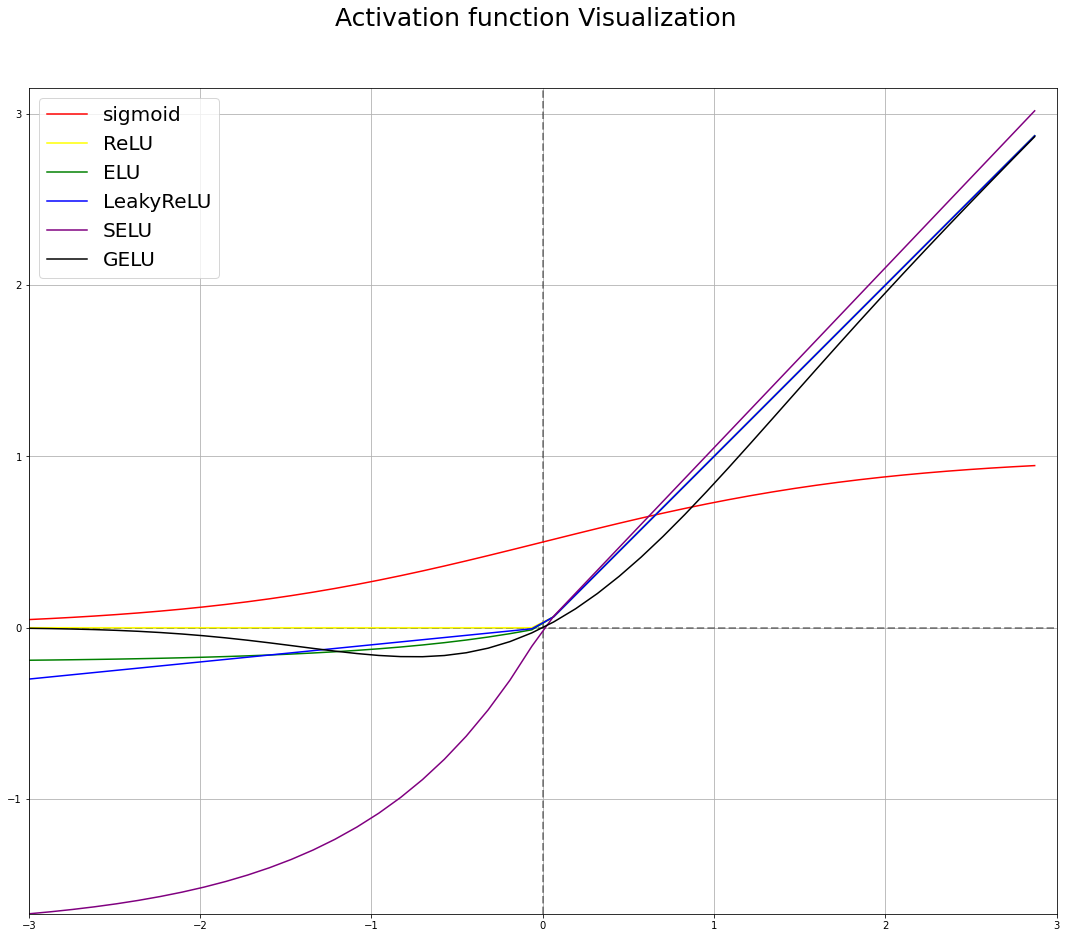

In [281]:
vis.visualize(15,15,50)